In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 3.3MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=b95d892a9db9ac40524b2075a2b7e35085ad6e591bdda4447c7c9a49af13e325
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 2.7MB/s 
     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=3fc5c0903549e5706099fc3532f51883bb955a130262cf26b6a008d1532af140
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [6]:
df = pd.read_json('pretty_jp_tweets_request.json')
#df_sample = pd.read_csv('TwitterData.csv')



In [7]:
#Sentiment Analysis
#Vader Sentiment

In [8]:
analyzer = SentimentIntensityAnalyzer()

In [9]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [10]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [11]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [12]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

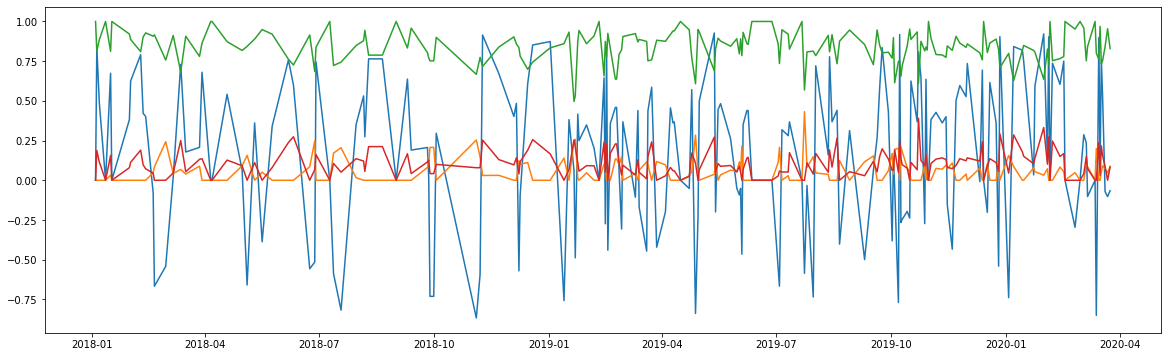

In [13]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [14]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'PLANO NOW\n\n...At Legacy West\n\n...JPMorgan Chase Requests City Approval\n\n...For Seven Story, 1,900 Space Parking Garage\n\n...To Free Up Space 4 a 2nd Office Tower\n\n\u2066@LegacyWestPlano\u2069\n\nThanks \u2066@SteveBrownDMN\u2069https://www.dallasnews.com/business/real-estate/2018/12/18/jpmorgan-chase-files-plans-expand-huge-campus-planos-legacy-west\xa0…'

In [15]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'PLANO NOW\n\n...At Legacy West\n\n...JPMorgan Chase Requests City Approval\n\n...For Seven Story, 1,900 Space Parking Garage\n\n...To Free Up Space 4 a 2nd Office Tower\n\n\u2066@LegacyWestPlano\u2069\n\nThanks \u2066@SteveBrownDMN\u2069https://www.dallasnews.com/business/real-estate/2018/12/18/jpmorgan-chase-files-plans-expand-huge-campus-planos-legacy-west\xa0…'

Text(0, 0.5, 'Sentiment')

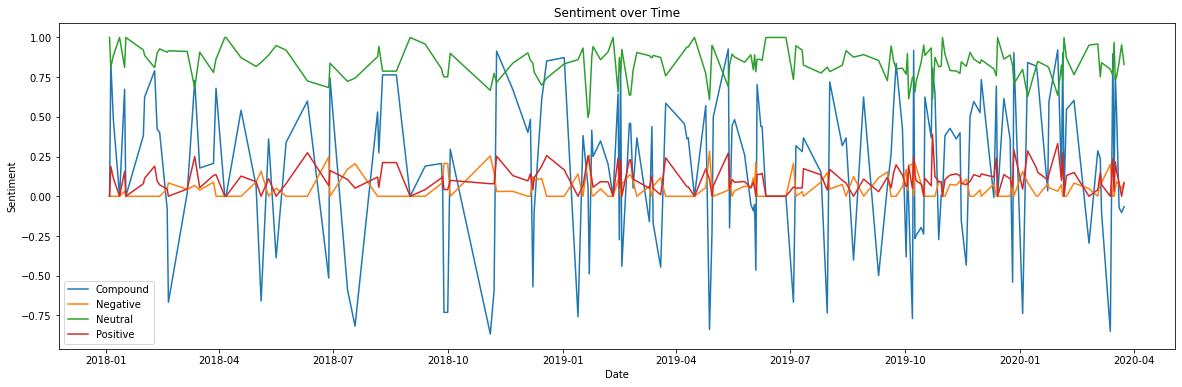

In [16]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

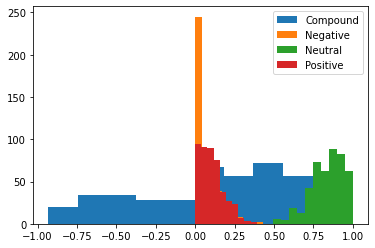

In [17]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

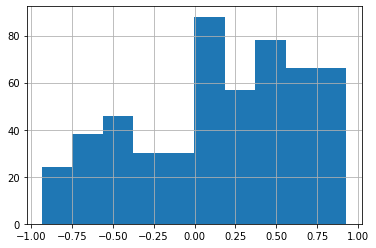

In [18]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [19]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.744,0.256,0.8519
1,0.699,0.189,0.6069
2,0.782,0.117,-0.0943
3,0.836,0.040,-0.5707
4,0.858,0.142,0.4843
...,...,...,...
518,0.776,0.224,0.8442
519,0.927,0.073,0.0516
520,0.884,0.000,-0.5775
521,0.812,0.081,-0.2960


In [22]:
#Importing Various twitter data
# all JP files
#Complain

#Request
df = pd.read_json('pretty_jp_tweets_request.json')


In [23]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 19.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=3a39b886c39a2e9e8c44b00db4a7e9a8de0bba88e9ea991830a37a9284570095
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=011cb8f4d03485906e1718284ebe5910965ad766a22d0027bad361825e341bc0
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [24]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [25]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(523, 171)


In [26]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [27]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [28]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [29]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,False,[],[],False,False,0,[https://www.dallasnews.com/business/real-esta...,,0,[],0,Plano_Now,PLANO NOW\n\n...At Legacy West\n\n...JPMorgan ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-19 00:41:29,2018-12-19 00:41:29,1075189342358986752,/Plano_Now/status/1075189342358986753,267343862,Plano Now,,0.000,0.744,0.256,0.8519
1,False,[MirMAK],[],False,True,0,[],1073589411273682945,0,"[{'screen_name': 'MirMAKOfficial', 'user_id': ...",0,LiveSalman999,Humble Request #MirMAK it's been over 2 decade...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-15 15:37:36,2018-12-15 15:37:36,1073965303615361024,/LiveSalman999/status/1073965303615361024,2302240797,Salman Ahmed,,0.112,0.699,0.189,0.6069
2,False,[],[],False,False,0,[],,0,[],1,Pierreledesma11,Hey JP MORGAN CHASE BANK. \nWHERE IS THE JOSE ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-09 10:57:59,2018-12-09 10:57:59,1071720610391384064,/Pierreledesma11/status/1071720610391384064,941134916233912320,Pierreledesma14@gmail.com,,0.101,0.782,0.117,-0.0943
3,False,"[Waynesville, Oakwood, perjuryobstrutingjustice]",[],True,False,0,[https://twitter.com/ConsiderThis1/status/1071...,,1,[],1,Darla_Marlene,I have sent requests to both @WellsFargo and @...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-08 21:08:22,2018-12-08 21:08:22,1071511827836739584,/Darla_Marlene/status/1071511827836739584,826640074783744000,Darla m. Buckland,,0.124,0.836,0.040,-0.5707
4,True,"[MyPlusStudentsClub, MyPlus, Disability, JPMor...",[https://pbs.twimg.com/media/DtuMqNaX4AEA2qw.jpg],False,False,1,[],,0,[],2,MyPlusStudents,Sponsored by @jpmorgan \nDon't miss this week'...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-06 09:00:57,2018-12-06 09:00:57,1070603995201331200,/MyPlusStudents/status/1070603995201331200,1927593780,MyPlus Students,,0.000,0.858,0.142,0.4843


In [30]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [31]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.079766 -0.128099       1        1  15.095034
3     -0.155232  0.138267       2        1  14.369422
1     -0.195358 -0.053328       3        1  12.661135
0      0.163183  0.110895       4        1  11.740498
9      0.011862  0.190783       5        1   8.880390
6      0.064896 -0.027745       6        1   8.868059
5     -0.017232  0.047627       7        1   8.551869
2      0.203221 -0.064509       8        1   7.662902
7     -0.082808 -0.111377       9        1   7.086354
4     -0.072298 -0.102514      10        1   5.084337, topic_info=          Term       Freq      Total Category  logprob  loglift
56      morgan  32.000000  32.000000  Default  30.0000  30.0000
87         www  11.000000  11.000000  Default  29.0000  29.0000
35  government   7.000000   7.000000  Default  28.0000  28.0000
37      health   7.000000   7.000000  Default  27.0000  27.0000
74         sir   7.000000   7.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
62         pay   0.114321   6.462938  Topic10  -5.6002  -1.0558
59        news   0.114321   8.020374  Topic10  -5.6002  -1.2717
52        like   0.114321   9.072805  Topic10  -5.6002  -1.3950
43        http   0.114321   9.728289  Topic10  -5.6002  -1.4648
18   corporate   0.114321   7.069873  Topic10  -5.6002  -1.1456

[430 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         4  0.717002  affiliation
1         1  0.814894      america
2         4  0.717002          aoc
3         3  0.318209     approval
3         4  0.636418     approval
...     ...       ...          ...
87        8  0.711527          www
88        3  0.198501         year
88        7  0.397002         year
88        8  0.198501         year
88        9  0.198501         year

[212 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 2, 1, 10, 7, 6, 3, 8, 5])

In [32]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.125312  0.168817       1        1  15.571669
4      0.254667  0.098784       2        1  12.443276
7     -0.139427  0.145126       3        1  12.202556
3      0.218847  0.024993       4        1  11.849091
9     -0.157935  0.081836       5        1  10.162249
1      0.046559 -0.266977       6        1   9.672477
6     -0.045063 -0.127812       7        1   9.132959
2     -0.249665  0.105304       8        1   7.829019
5     -0.070418 -0.208801       9        1   7.729114
8      0.017123 -0.021270      10        1   3.407590, topic_info=        Term       Freq      Total Category  logprob  loglift
2       bank  15.000000  15.000000  Default  30.0000  30.0000
5      chase  18.000000  18.000000  Default  29.0000  29.0000
24    people   9.000000   9.000000  Default  28.0000  28.0000
29      time   8.000000   8.000000  Default  27.0000  27.0000
27  requests   9.000000   9.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
14     https   0.276764  13.681840  Topic10  -3.4965  -0.5215
2       bank   0.276764  15.309478  Topic10  -3.4965  -0.6339
22    morgan   0.276764  15.713664  Topic10  -3.4965  -0.6600
5      chase   0.276764  18.536464  Topic10  -3.4965  -0.8252
6        com   0.276764  15.984233  Topic10  -3.4965  -0.6770

[360 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.494779  accused
0         3  0.329853  accused
1         3  0.525113    asked
1         4  0.175038    asked
1         9  0.175038    asked
...     ...       ...      ...
30        2  0.337532  twitter
30        4  0.590680  twitter
31        6  0.757373      won
31        9  0.151475      won
32        1  0.770823      www

[82 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 8, 4, 10, 2, 7, 3, 6, 9])

In [33]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.088398  0.219930       1        1  22.204047
9      0.148150  0.056536       2        1  20.741427
2     -0.113178  0.174827       3        1  16.590577
4      0.229988 -0.046599       4        1   9.910062
6     -0.275136 -0.298807       5        1   8.673362
8      0.231750 -0.166647       6        1   7.084197
7     -0.033294  0.015190       7        1   3.699082
5     -0.033294  0.015190       8        1   3.699082
3     -0.033294  0.015190       9        1   3.699082
0     -0.033294  0.015190      10        1   3.699082, topic_info=        Term       Freq      Total Category  logprob  loglift
1      chase  12.000000  12.000000  Default   9.0000   9.0000
6   requests   8.000000   8.000000  Default   8.0000   8.0000
3       http   7.000000   7.000000  Default   7.0000   7.0000
8        www   8.000000   8.000000  Default   6.0000   6.0000
5        pic   7.000000   7.000000  Default   5.0000   5.0000
..       ...        ...        ...      ...      ...      ...
6   requests   0.362442   8.839143  Topic10  -2.1972   0.1030
7    twitter   0.362442  10.733621  Topic10  -2.1972  -0.0912
4      https   0.362442  11.624623  Topic10  -2.1972  -0.1709
1      chase   0.362442  12.635288  Topic10  -2.1972  -0.2543
2        com   0.362442  14.133943  Topic10  -2.1972  -0.3664

[99 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         3  0.764211       bit
1         2  0.158287     chase
1         4  0.316574     chase
1         6  0.395717     chase
2         1  0.353758       com
2         2  0.353758       com
2         3  0.141503       com
2         4  0.070752       com
3         3  0.791405      http
4         1  0.086024     https
4         2  0.430121     https
4         3  0.086024     https
4         4  0.258073     https
5         1  0.753921       pic
6         5  0.791932  requests
7         1  0.652156   twitter
7         3  0.186330   twitter
8         2  0.737620       www, R=9, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 3, 5, 7, 9, 8, 6, 4, 1])

In [34]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(289, 25)
(162, 25)
(72, 25)
